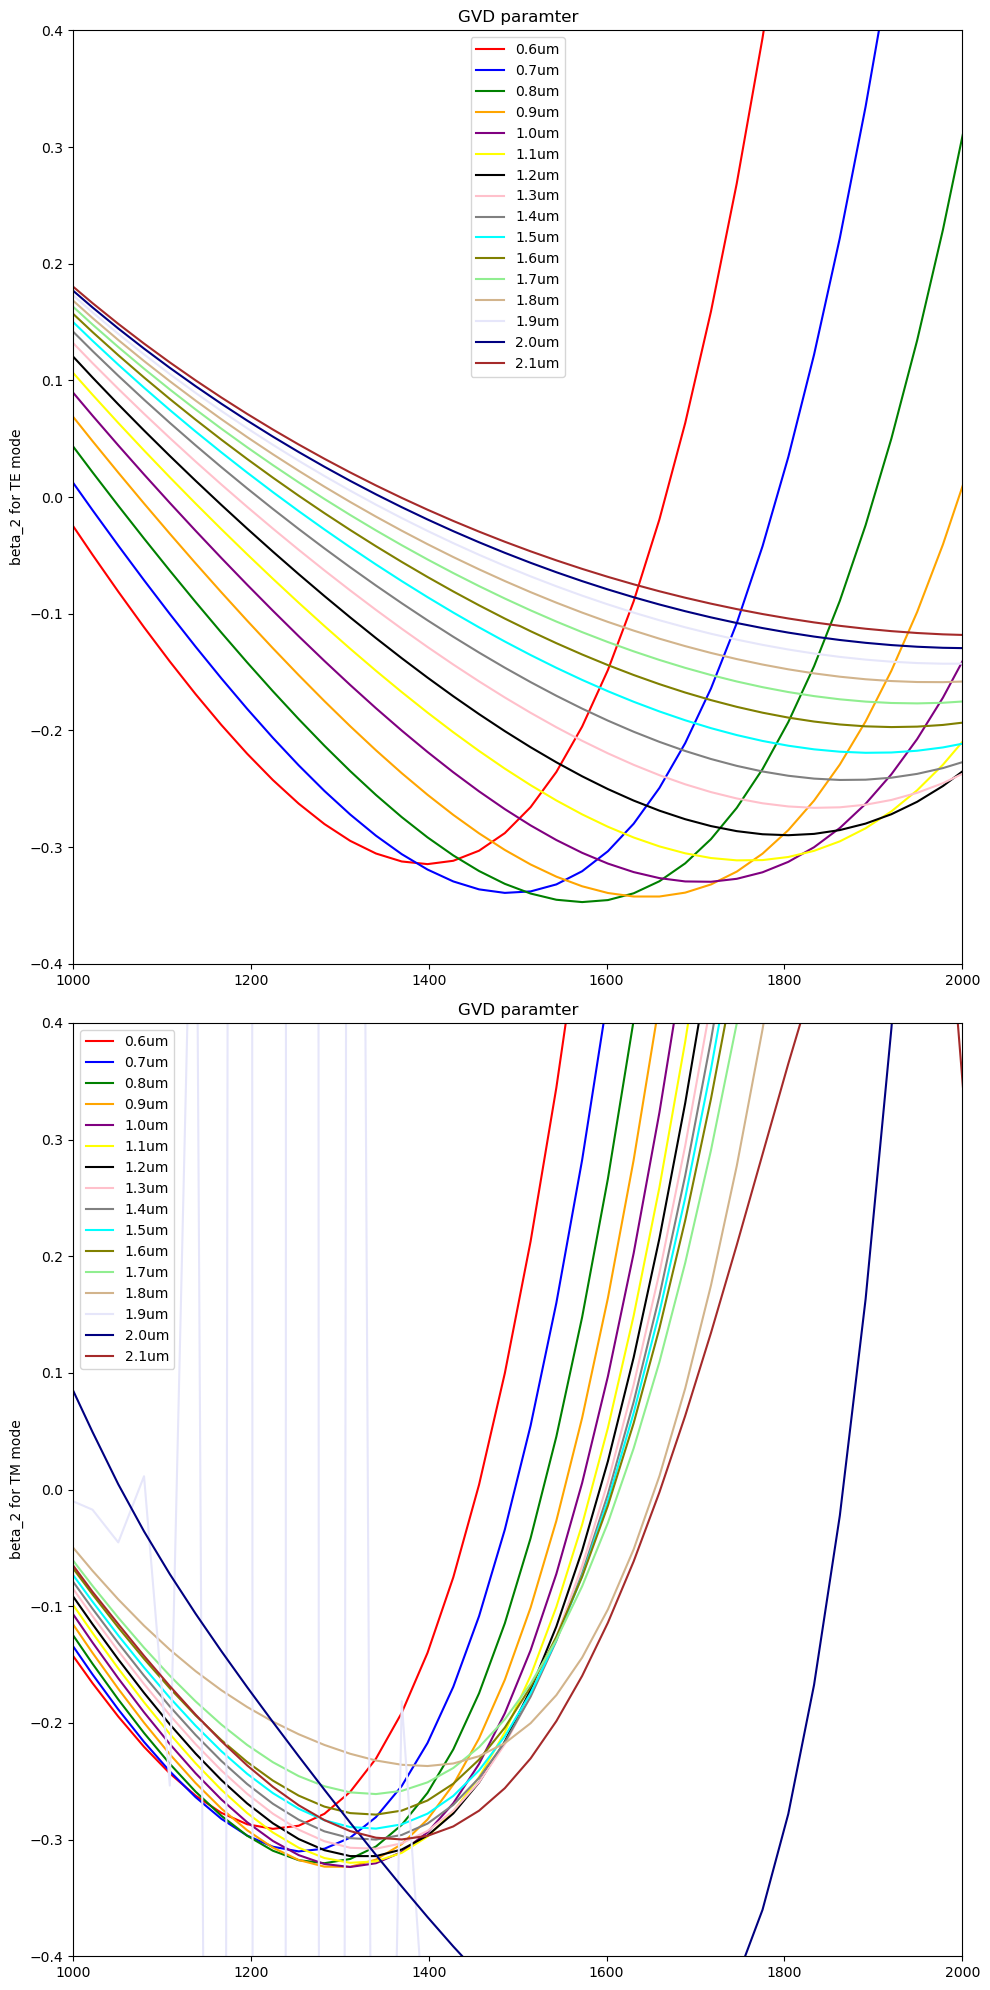

In [1]:
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
from SCG_Stimulation.Simulation.refractive_index import n_SiO2,n_LNOI,n_Air
from scipy.interpolate import UnivariateSpline
from scipy.constants import speed_of_light as c
import pandas as pd
top_widths = [round(x/10,1) for x in range(6,22,1)]
colors = ["red", "blue", "green", "orange", "purple", "yellow", "black", "pink", "gray", "cyan", "olive", "lightgreen", "tan","lavender","navy","brown"]

fig, axs = plt.subplots(2, 1, figsize=(10,20))

for count, top_width in enumerate(top_widths):
    data_tm = np.load(f"{top_width}um/data_w_{top_width}_e.npz")
    data_te = np.load(f"{top_width}um/data_w_{top_width}_o.npz")
    neff_list_tm = np.array(np.real(data_tm['neff_list_tm']))
    neff_list_te = np.array(np.real(data_te['neff_list_te']))
    
    wls = np.linspace(500, 2500, 70)*1e-9
    angular_freq =  lambda w:(c/ w) * 2 * np.pi
    beta_tm = neff_list_tm * 2*np.pi/(wls)
    beta_te = neff_list_te * 2*np.pi/(wls)
    
    sorted_w = angular_freq(wls)[::-1]
    sorted_beta_tm = beta_tm[::-1]
    sorted_beta_te = beta_te[::-1]
    
    #-----------fit neff spline----------------------------------
    y_spl_tm = UnivariateSpline(sorted_w,sorted_beta_tm,s=0,k=3)
    y_spl_te = UnivariateSpline(sorted_w,sorted_beta_te,s=0,k=3)
    
    w_range = np.linspace(wls[0],wls[-1],1000)
    x_range = angular_freq(w_range)
    
    y_spl_2d_tm = y_spl_tm.derivative(n=2)
    y_spl_2d_te = y_spl_te.derivative(n=2)
    
    beta_2_tm = y_spl_2d_tm(angular_freq(wls)) * 1e24
    beta_2_te = y_spl_2d_te(angular_freq(wls)) * 1e24
    
    #-----------beta_2 TE plot---------------------------
    axs[0].plot(wls * 1e9, beta_2_te, label = f"{top_width}um", c=colors[count])
    
    
    #-----------beta_2 TM plot---------------------------
    axs[1].plot(wls * 1e9, beta_2_tm, label = f"{top_width}um", c=colors[count])

axs[0].set_ylabel("beta_2 for TE mode")
axs[0].set_title("GVD paramter")
axs[0].legend()
axs[0].set_xlim(1000,2000)
axs[0].set_ylim(-0.4,0.4)

axs[1].set_ylabel("beta_2 for TM mode")
axs[1].set_title("GVD paramter")
axs[1].legend()
axs[1].set_xlim(1000,2000)
axs[1].set_ylim(-0.4,0.4)



plt.tight_layout()
plt.show()